Current scene: FloorPlan1_physics
Agent position: {'x': -1.0, 'y': 0.9009995460510254, 'z': 1.0}
Agent rotation: {'x': -0.0, 'y': 270.0, 'z': 0.0}


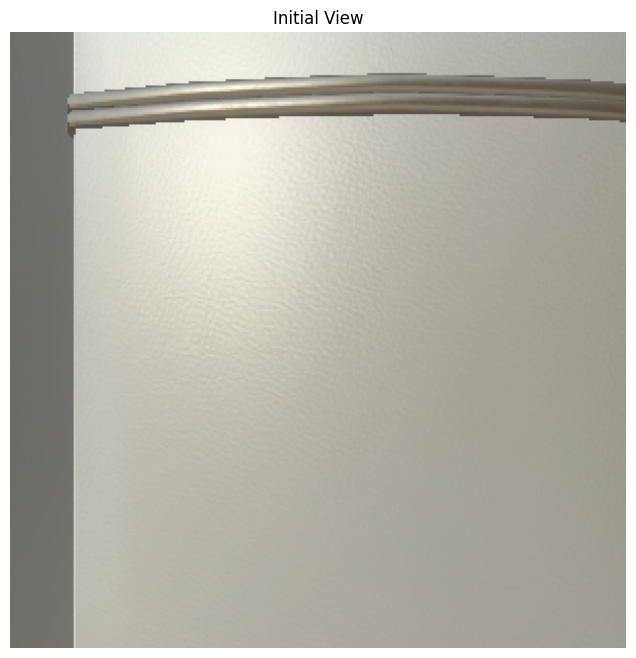

Available actions:
- cameraNearPlane
- cameraFarPlane

Total objects in scene: 77
Currently visible objects: 1

Object types in this scene:
- Apple: 1
- Book: 1
- Bottle: 1
- Bowl: 1
- Bread: 1
- ButterKnife: 1
- Cabinet: 9
- CoffeeMachine: 1
- CounterTop: 3
- CreditCard: 1
- Cup: 1
- DishSponge: 1
- Drawer: 9
- Egg: 1
- Faucet: 1
- Floor: 1
- Fork: 1
- Fridge: 1
- GarbageCan: 1
- HousePlant: 1
- Kettle: 1
- Knife: 1
- Lettuce: 1
- LightSwitch: 1
- Microwave: 1
- Mug: 1
- Pan: 1
- PaperTowelRoll: 1
- PepperShaker: 1
- Plate: 1
- Pot: 1
- Potato: 1
- SaltShaker: 1
- Shelf: 3
- ShelvingUnit: 1
- Sink: 1
- SinkBasin: 1
- SoapBottle: 1
- Spatula: 1
- Spoon: 1
- Statue: 1
- Stool: 2
- StoveBurner: 4
- StoveKnob: 4
- Toaster: 1
- Tomato: 1
- Vase: 2
- Window: 1
- WineBottle: 1


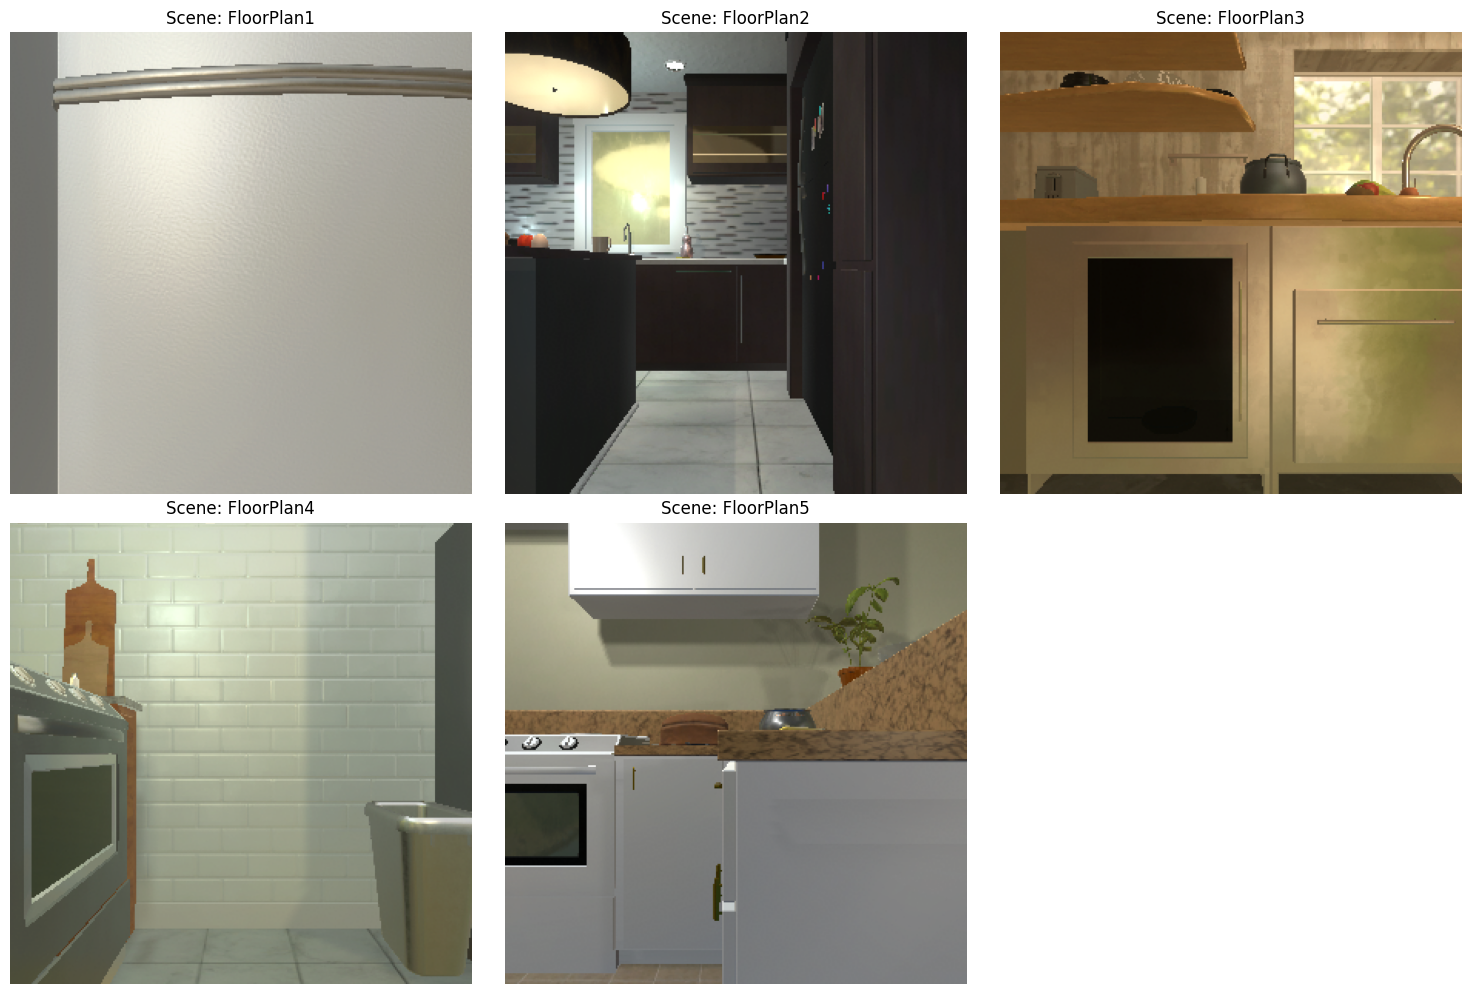

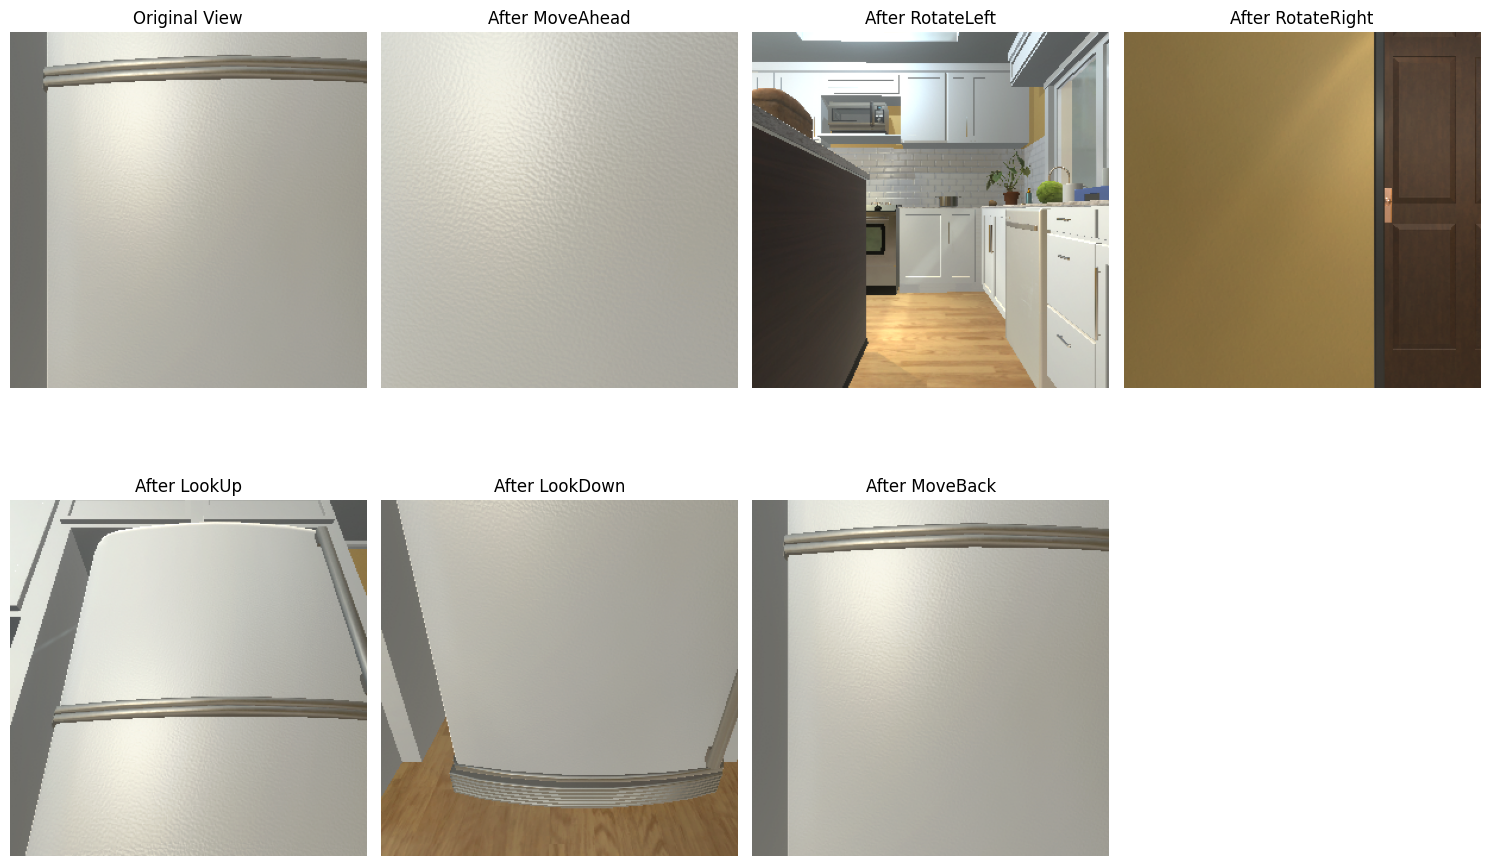


Searching for Microwave...
Could not find Microwave in the current scene.
Trying in FloorPlan2...


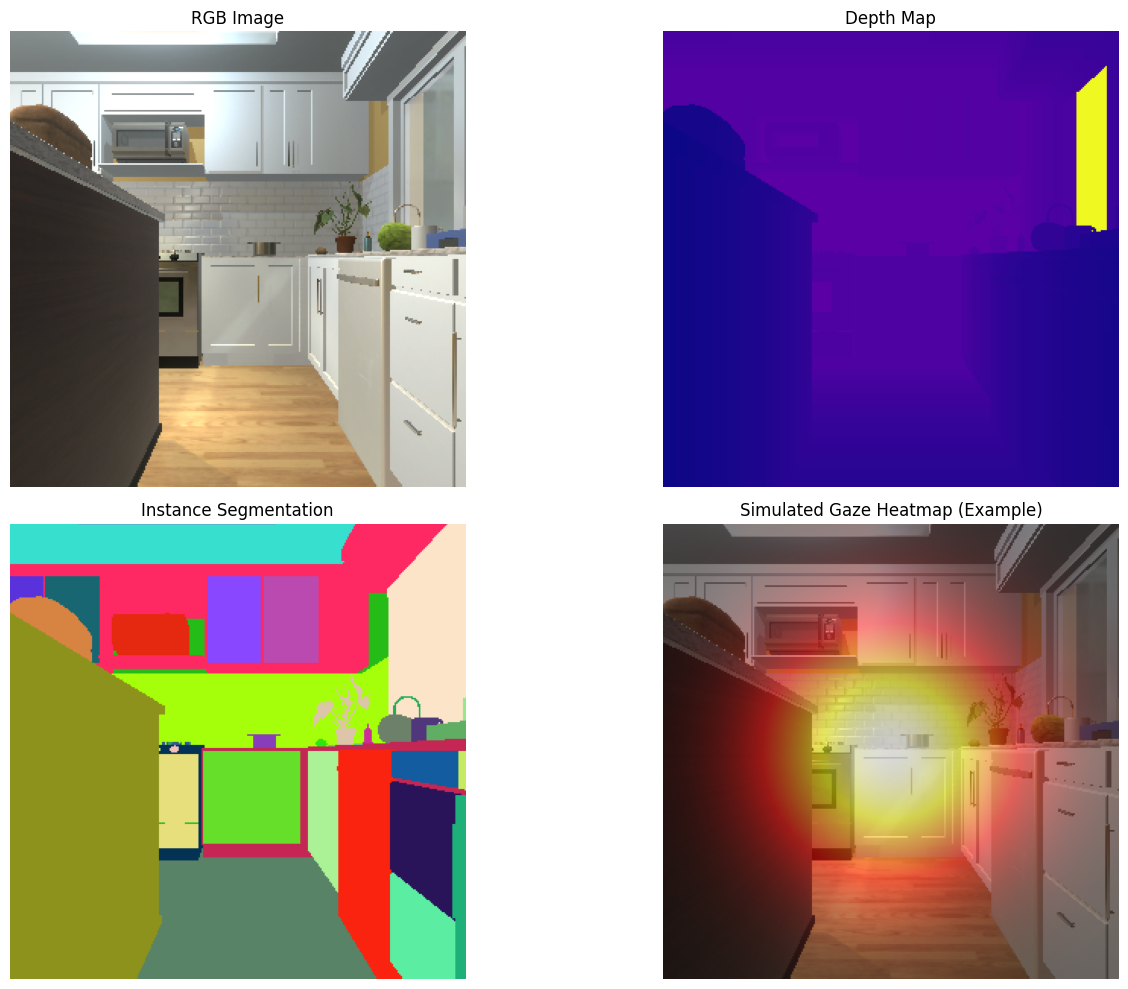

Environment exploration complete!


In [4]:
# environment_exploration.ipynb
import ai2thor.controller
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import time

# Initialize controller
controller = ai2thor.controller.Controller(
    agentMode="locobot",  # Can also try "default" or "drone" 
    visibilityDistance=1.5,
    scene="FloorPlan1",   # Kitchen scene
    gridSize=0.25,
    renderDepthImage=True,
    renderInstanceSegmentation=True,
    width=300,
    height=300
)

# Display basic environment information
print(f"Current scene: {controller.last_event.metadata['sceneName']}")
print(f"Agent position: {controller.last_event.metadata['agent']['position']}")
print(f"Agent rotation: {controller.last_event.metadata['agent']['rotation']}")

# Show the current view
plt.figure(figsize=(10, 8))
plt.imshow(controller.last_event.frame)
plt.title("Initial View")
plt.axis('off')
plt.show()

# List available actions
print("Available actions:")
for action in controller.last_event.metadata["actionReturn"]:
    print(f"- {action}")

# List all objects in the scene
objects = controller.last_event.metadata['objects']
visible_objects = [obj for obj in objects if obj['visible']]

print(f"\nTotal objects in scene: {len(objects)}")
print(f"Currently visible objects: {len(visible_objects)}")

# Show all object types in the scene
object_types = sorted(list(set([obj['objectType'] for obj in objects])))
print("\nObject types in this scene:")
for obj_type in object_types:
    count = sum(1 for obj in objects if obj['objectType'] == obj_type)
    print(f"- {obj_type}: {count}")

# Explore different kitchen scenes
kitchen_scenes = [f"FloorPlan{i}" for i in range(1, 6)]  # First 5 kitchen scenes

plt.figure(figsize=(15, 10))
for i, scene in enumerate(kitchen_scenes):
    controller.reset(scene=scene)
    plt.subplot(2, 3, i+1)
    plt.imshow(controller.last_event.frame)
    plt.title(f"Scene: {scene}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Test navigation actions
actions = ['MoveAhead', 'RotateLeft', 'RotateRight', 'LookUp', 'LookDown', 'MoveBack']

plt.figure(figsize=(15, 10))
controller.reset(scene="FloorPlan1")  # Reset to first kitchen
original_frame = controller.last_event.frame.copy()

# Show original view
plt.subplot(2, 4, 1)
plt.imshow(original_frame)
plt.title("Original View")
plt.axis('off')

# Try each action
for i, action in enumerate(actions):
    # Reset to original position
    controller.reset(scene="FloorPlan1")
    # Execute action
    event = controller.step(action=action)
    # Show result
    plt.subplot(2, 4, i+2)
    plt.imshow(event.frame)
    plt.title(f"After {action}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Search for a specific object
target_object = "Microwave"
print(f"\nSearching for {target_object}...")

controller.reset(scene="FloorPlan1")
found = False

# Try to find the object by rotating
for _ in range(4):  # 4 rotations to cover 360 degrees
    objects = controller.last_event.metadata['objects']
    target_objects = [obj for obj in objects if obj['objectType'] == target_object and obj['visible']]
    
    if target_objects:
        found = True
        target = target_objects[0]
        print(f"Found {target_object}!")
        print(f"Position: {target['position']}")
        print(f"Distance: {target['distance']}")
        
        plt.figure(figsize=(8, 6))
        plt.imshow(controller.last_event.frame)
        plt.title(f"Found {target_object}")
        plt.axis('off')
        plt.show()
        
        # Draw bounding box
        if 'pixelCoords' in target:
            frame = controller.last_event.frame.copy()
            x1, y1, x2, y2 = target['pixelCoords']
            # Draw rectangle
            frame[y1:y1+2, x1:x2] = [255, 0, 0]  # Top horizontal line
            frame[y2-2:y2, x1:x2] = [255, 0, 0]  # Bottom horizontal line
            frame[y1:y2, x1:x1+2] = [255, 0, 0]  # Left vertical line
            frame[y1:y2, x2-2:x2] = [255, 0, 0]  # Right vertical line
            
            plt.figure(figsize=(8, 6))
            plt.imshow(frame)
            plt.title(f"{target_object} with bounding box")
            plt.axis('off')
            plt.show()
        
        break
    
    # Rotate and look again
    controller.step(action="RotateRight", degrees=90)
    time.sleep(0.5)  # Small delay to see rotation

if not found:
    print(f"Could not find {target_object} in the current scene.")
    # Try another kitchen
    controller.reset(scene="FloorPlan2")
    print(f"Trying in FloorPlan2...")
    
    for _ in range(4):
        objects = controller.last_event.metadata['objects']
        target_objects = [obj for obj in objects if obj['objectType'] == target_object and obj['visible']]
        
        if target_objects:
            found = True
            target = target_objects[0]
            print(f"Found {target_object}!")
            
            plt.figure(figsize=(8, 6))
            plt.imshow(controller.last_event.frame)
            plt.title(f"Found {target_object} in FloorPlan2")
            plt.axis('off')
            plt.show()
            break
        
        controller.step(action="RotateRight", degrees=90)
        time.sleep(0.5)

# Explore different segmentation views
controller.reset(scene="FloorPlan1")
# Try to find an interesting view with multiple objects
for _ in range(4):
    controller.step(action="RotateRight", degrees=90)
    objects = controller.last_event.metadata['objects']
    visible_objects = [obj for obj in objects if obj['visible']]
    if len(visible_objects) > 3:
        break

# Show different renderings
plt.figure(figsize=(15, 10))

# RGB image
plt.subplot(2, 2, 1)
plt.imshow(controller.last_event.frame)
plt.title("RGB Image")
plt.axis('off')

# Depth image
if hasattr(controller.last_event, 'depth_frame') and controller.last_event.depth_frame is not None:
    plt.subplot(2, 2, 2)
    plt.imshow(controller.last_event.depth_frame, cmap='plasma')
    plt.title("Depth Map")
    plt.axis('off')

# Instance segmentation
if hasattr(controller.last_event, 'instance_segmentation_frame') and controller.last_event.instance_segmentation_frame is not None:
    plt.subplot(2, 2, 3)
    plt.imshow(controller.last_event.instance_segmentation_frame)
    plt.title("Instance Segmentation")
    plt.axis('off')

# What would a gaze heatmap look like?
# Create a simple dummy heatmap
h, w, _ = controller.last_event.frame.shape
heatmap = np.zeros((h, w))
# Create a gaussian blob in the center
x, y = np.meshgrid(np.linspace(-1, 1, w), np.linspace(-1, 1, h))
d = np.sqrt(x*x+y*y)
sigma, mu = 0.4, 0.0
heatmap = np.exp(-((d-mu)**2 / (2.0*sigma**2)))

plt.subplot(2, 2, 4)
plt.imshow(controller.last_event.frame)
plt.imshow(heatmap, alpha=0.5, cmap='hot')
plt.title("Simulated Gaze Heatmap (Example)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Close the controller
controller.stop()
print("Environment exploration complete!")